1. Using pydataset, load the faithful dataset and read it's documentation.

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import env
import numpy as np
import pydataset
from pydataset import data

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [16]:
data('faithful', show_doc=True)

faithful

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Old Faithful Geyser Data

### Description

Waiting time between eruptions and the duration of the eruption for the Old
Faithful geyser in Yellowstone National Park, Wyoming, USA.

### Usage

    faithful

### Format

A data frame with 272 observations on 2 variables.

[,1]

eruptions

numeric

Eruption time in mins

[,2]

waiting

numeric

Waiting time to next eruption (in mins)

### Details

A closer look at `faithful$eruptions` reveals that these are heavily rounded
times originally in seconds, where multiples of 5 are more frequent than
expected under non-human measurement. For a better version of the eruption
times, see the example below.

There are many versions of this dataset around: Azzalini and Bowman (1990) use
a more complete version.

### Source

W. Härdle.

### References

Härdle, W. (1991) _Smoothing Techniques with Implementation in S_. New York:
Springer.

Azzalini, A. 

In [17]:
df = data('faithful')

In [3]:
df.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [4]:
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 1 to 272
Data columns (total 2 columns):
eruptions    272 non-null float64
waiting      272 non-null int64
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

eruptions    0
waiting      0
dtype: int64

2. What is pearson's r for the two variables?

In [7]:
stats.pearsonr(df[['waiting']], df[['eruptions']])

(array([0.90081117]), array([8.12995851e-100]))

In [8]:
stats.pearsonr(df.waiting, df.eruptions)

(0.9008111683218131, 8.129958506616628e-100)

In [9]:
'r = {:.2f}, p = {:.3}'.format(*stats.pearsonr(df.waiting, df.eruptions))

'r = 0.90, p = 8.13e-100'

3. Visualize the relationship between the variables.

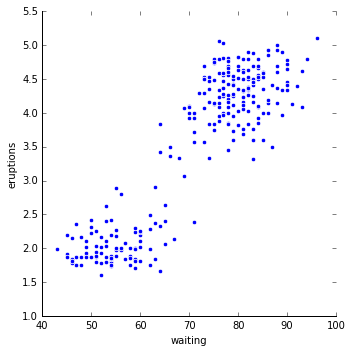

In [10]:
sns.relplot(data=df, x='waiting', y='eruptions')

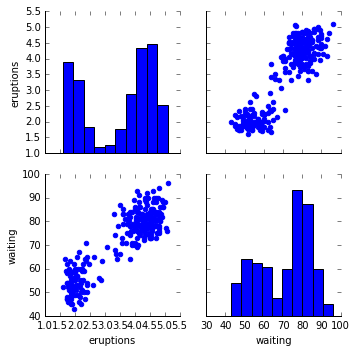

In [11]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


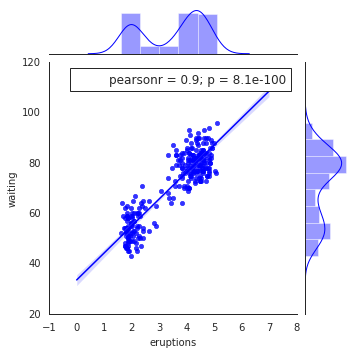

In [12]:
with sns.axes_style('white'):
    j = sns.jointplot("eruptions", "waiting", data=df, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

4. Build a linear model that predicts eruptions based on waiting.

In [13]:
lm = LinearRegression()
lm.fit(df[['waiting']], df.eruptions)

df['predicted'] = lm.predict(df[['waiting']])

df.head()

,eruptions,waiting,predicted
1,3.600,79,4.100592
2,1.800,54,2.209893
3,3.333,74,3.722452
4,2.283,62,2.814917
5,4.533,85,4.554360


5. Create a visualization with your predictions

    i. waiting should be on the x axis, and eruptions on the y

    ii. Use color to differentiate the actual vs predicted values.

    iii. Add a descriptive title.
    
    iv. Change the y ticks such that they are all integers (i.e. no decimals)
    
    v. Add the root mean squared error of your predictions as an annotation.

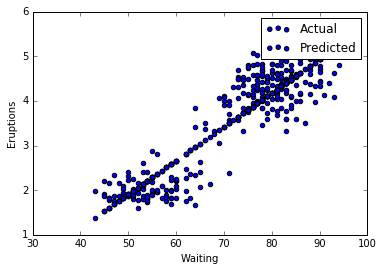

In [14]:
plt.scatter(df.waiting, df.eruptions, label='Actual')
plt.scatter(df.waiting, df.predicted, label='Predicted')
plt.xlabel('Waiting')
plt.ylabel('Eruptions')
plt.legend()

Text(50, 5.5, 'RMSE: 0.24')

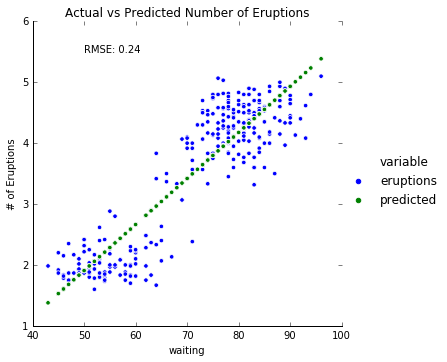

In [15]:
(pd.melt(df, id_vars='waiting')
 .pipe((sns.relplot, 'data'), x='waiting', y='value', hue='variable'))

rmse = mean_squared_error(df.eruptions, df.predicted)

plt.ylabel('# of Eruptions')
plt.title('Actual vs Predicted Number of Eruptions')
plt.yticks(range(1, 7))
plt.text(50, 5.5, 'RMSE: {:.2}'.format(rmse))